In [1]:
import sys
sys.path.append("..")

import networkx as nx
import logging
import matplotlib.pyplot as plt
from src.graphgen.graph_with_motifs_dataset import *

In [2]:
# Configure logging # Adjust the logging level as needed
logging.basicConfig(filename='graphGenDataset_log.log', level=logging.INFO, force=True)
# force will rerun logging.basicConfig, otherwise its subsequent calls are ignored

In [3]:
graph = GraphWithMotifsDataset(
    num_graphs=12,
    min_nodes=15,
    max_nodes=20,
    base_graph_model='ER',
    motif_graph_model='BA',
    p=0.3,
    m=3,
    min_motif_size=5,
    max_motif_size=8,
    min_num_motifs=1,
    max_num_motifs=1,
)
graph.generate_dataset()
dataset = graph.get_dataset()

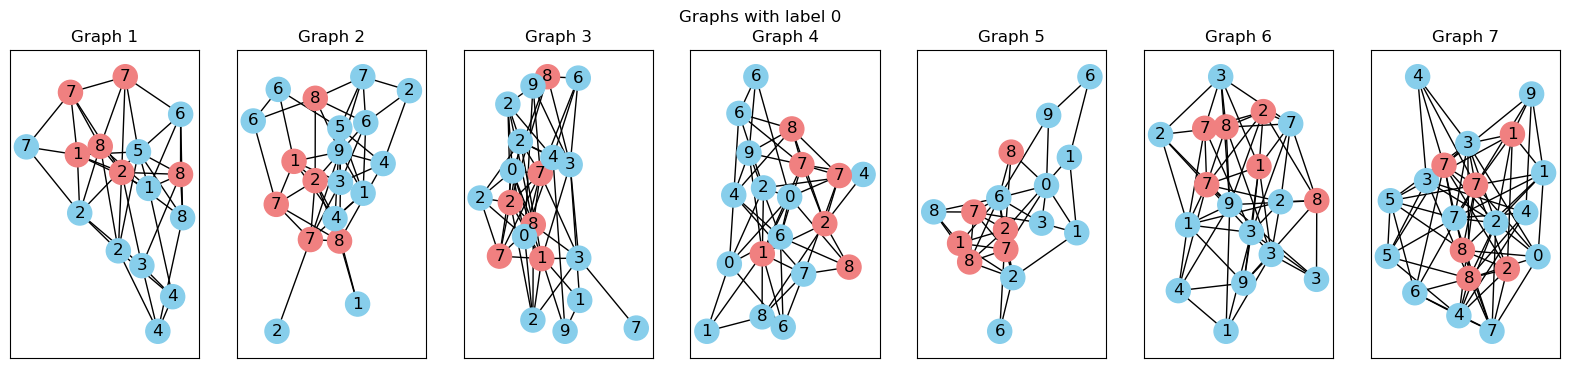

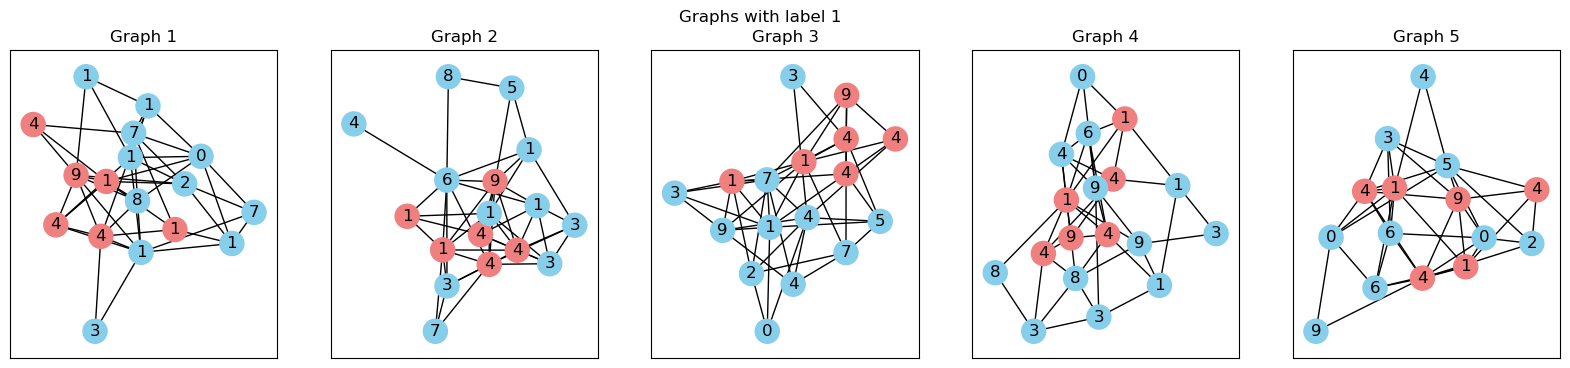

In [4]:
for label in set([label for _, _, _, label in dataset]):
    graphs = [(nx.Graph(g), m, f) for g, m, f, l in dataset if l == label]
    fig, axs = plt.subplots(1, len(graphs), figsize=(20, 4))
    fig.suptitle(f"Graphs with label {label}")
    for i, (g, m, f) in enumerate(graphs):
        # print(f'Graph {i+1}, nodes: {len(g.nodes())}, edges: {len(g.edges())}, node features: {f}, label: {label}')
        # get non-zero entry in node features
        node_labels = {k:np.argmax(v) for k, v in f.items()}
        axs[i].set_title(f"Graph {i+1}")
        pos = nx.spring_layout(g)
        # there is only one motif in the list for this binary classification problem
        node_colors = ['lightcoral' if node in m[0] else 'skyblue' for node in g.nodes]
        nx.draw_networkx(g, pos=pos, node_color=node_colors, ax=axs[i], labels=node_labels)
    plt.show()

In [7]:
# save dataset to file
graph.save_dataset(dataset_name='graphGenDataset10')

In [10]:
# generate a larger dataset
graph = GraphWithMotifsDataset(
    num_graphs=8000,
    min_nodes=30,
    max_nodes=40,
    base_graph_model='ER',
    motif_graph_model='BA',
    p=0.3,
    m=3,
    min_motif_size=5,
    max_motif_size=8,
    min_num_motifs=1,
    max_num_motifs=1,
)
graph.generate_dataset()
graph.save_dataset(dataset_name='graphGenDataset8000')

In [59]:
# generate a larger dataset
graph = GraphWithMotifsDataset(
    num_graphs=500,
    min_nodes=30,
    max_nodes=40,
    base_graph_model='BA',
    motif_graph_model='WS',
    p=0.1,
    m=2,
    k=3,
    min_motif_size=3,
    max_motif_size=4,
    min_num_motifs=1,
    max_num_motifs=1,
)
graph.generate_dataset()
graph.save_dataset(dataset_name='graphGenDataset500')

In [60]:
dataset = graph.get_dataset()

In [61]:
dataset[0][1], dataset[0][3], dataset[3][1], dataset[3][3]

([[30, 13, 8]], 1, [[28, 18, 8]], 1)

In [62]:
def shortest_path(node, motif_nodes, graph):
    paths = []
    for m in motif_nodes:
        path = nx.shortest_path(graph, source=node, target=m)
        paths.append(len(path)-1)
        # print(path)
        # print(paths[-1])
    return min(paths)


shortest_paths = {}
G = nx.Graph(dataset[0][0])
for node in G.nodes:
    # shortest path from node to motif
    shortest_paths[node] = shortest_path(node, motifs[0], G)

print(list(shortest_paths.values()))

[1, 1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 3, 0, 1, 2, 0, 1]


<BarContainer object of 4 artists>

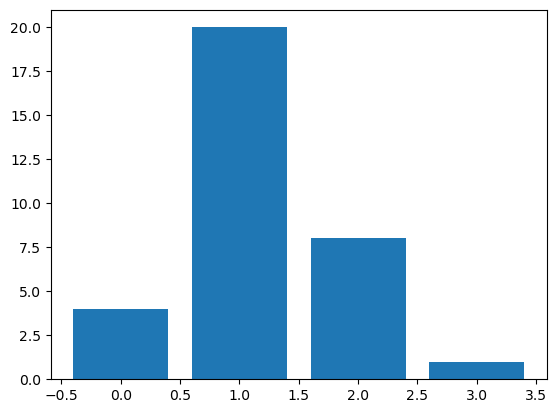

In [63]:
plt.bar(*np.unique(list(shortest_paths.values()), return_counts=True))